In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [29]:
import matplotlib.pyplot as plt

In [4]:
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
input_dim=28
input_neurons=784
hidden_neurons=500
noise=0.25


In [7]:
x=tf.placeholder(float,[None,input_neurons],name="input_x")

In [8]:
mask=tf.placeholder(float,[None,input_neurons],name="mask")

In [10]:
weight_encode=tf.Variable(tf.random_normal([input_neurons,hidden_neurons]))
bias_encode=tf.Variable(tf.zeros([hidden_neurons]))

In [11]:
weight_decode=tf.transpose(weight_encode)
bias_decode=tf.Variable(tf.zeros([input_neurons]))

In [19]:
noised_input=mask*x
autoencoded_output=tf.nn.sigmoid(tf.matmul(noised_input,weight_encode)+bias_encode)
decoded_output=tf.nn.sigmoid(tf.matmul(autoencoded_output,weight_decode))+bias_decode


In [20]:
loss=tf.reduce_mean(0.5*tf.pow(x-decoded_output,2))

In [21]:
optim=tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [22]:
x_test,y_test=mnist.test.images,mnist.test.labels

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(40000):
        x_train,y_train=mnist.train.next_batch(128)
        cache=np.random.binomial(1,0.7,128*784).reshape(128,784)
        res,_=sess.run([loss,optim],feed_dict={x:x_train,mask:cache})
        if i%100==0:
            print(res)
        
    
            
    cache=np.random.binomial(1,0.7,10000*784).reshape(10000,784)
    k=sess.run(decoded_output,feed_dict={x:x_test,mask:cache})
    print("Test Loss",sess.run(loss,feed_dict={x:x_test,mask:cache}))
        
        
        

0.22115868
0.21910885
0.21735711
0.21344963
0.21267048
0.20936355
0.20819713
0.20587839
0.2036823
0.20207557
0.20057258
0.19935632
0.19629122
0.19517931
0.19399585
0.1924048
0.1905256
0.1880597
0.18723164
0.18500854
0.18410614
0.18177192
0.1812284
0.17960301
0.17756818
0.17587845
0.17504843
0.17315355
0.17115249
0.17095946
0.16877423
0.16691524
0.1662751
0.1656121
0.163803
0.16328838
0.16077986
0.15974961
0.15878266
0.15714484
0.15637212
0.15470217
0.1531334
0.1530222
0.15125534
0.15031783
0.1492161
0.14838941
0.14650224
0.1468035
0.14583199
0.14440477
0.1431069
0.1424913
0.14160717
0.14058664
0.1392802
0.13868664
0.13755752
0.13672404
0.13489486
0.13477108
0.13395393
0.1330392
0.13180046
0.1305621
0.13060123
0.12950432
0.1282451
0.12771034
0.12782504
0.12627403
0.12602642
0.12496612
0.12357045
0.123372234
0.12272716
0.122097075
0.12124967
0.12011795
0.120073885
0.118647665
0.119228676
0.11769488
0.11687651
0.116293594
0.11645061
0.11528527
0.11468592
0.112897694
0.1133592
0.11329711
0

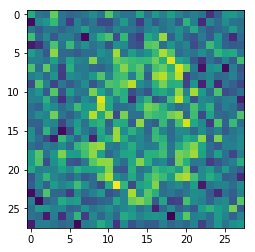

In [51]:
plt.imshow(k[13].reshape(28,28))

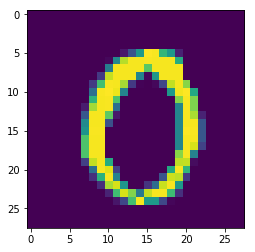

In [52]:
#looks 0 to me ,lets check
plt.imshow(x_test[13].reshape(28,28))

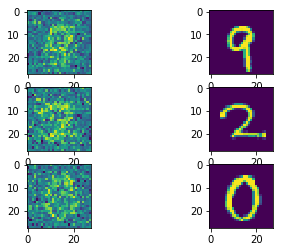

In [69]:
#lets check another time
f,ax=plt.subplots(3,2)
ax[0,0].imshow(k[113].reshape(28,28))
ax[0,1].imshow(x_test[113].reshape(28,28))
ax[1,0].imshow(k[77].reshape(28,28))
ax[1,1].imshow(x_test[77].reshape(28,28))
ax[2,0].imshow(k[13].reshape(28,28))
ax[2,1].imshow(x_test[13].reshape(28,28))

